### Import Lib and dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
tf.random.set_seed(1234)
import os
import random
from keras.layers import LeakyReLU

In [2]:
os.environ['PYTHONHASHSEED']=str(1234)
tf.random.set_seed(1234)
np.random.seed(1234)
random.seed(1234)

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from mlxtend.plotting import plot_decision_regions
%matplotlib inline


In [4]:
PCA_df = pd.read_csv(r"Sets/pca_3.csv",index_col=[0])
PCA_df

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.485152,-0.268583,-0.507123,0.513626,-0.233606,0.030368,0.058925,-0.343838,0.243563,0.286981,...,-0.099946,0.081991,0.090898,-0.017447,0.121411,-0.015282,0.080368,-0.118612,-0.045980,-0.011813
1,-0.145042,-0.353461,-0.183404,-0.139457,-0.245284,-0.129782,0.252421,-0.349743,0.220273,0.805366,...,0.155708,-0.099277,0.057628,0.085873,-0.022387,-0.130570,0.083693,0.089900,0.141666,0.119717
2,-0.173621,-0.210423,-0.200054,-0.314970,0.105571,-0.199907,-0.110117,0.278727,-0.162158,0.274271,...,0.159069,-0.130396,-0.007525,0.038919,-0.133981,0.069500,0.077070,0.069247,-0.060637,-0.157007
3,0.396161,-0.094074,-0.584406,0.188463,0.424859,0.632022,-0.447740,-0.320468,0.039108,-0.089374,...,0.037839,-0.076964,0.109443,-0.010140,0.230267,0.041187,-0.201982,0.065821,-0.019499,-0.062648
4,-0.427098,-0.211032,0.043938,0.211464,-0.214811,-0.171968,-0.411327,-0.091980,0.044690,-0.117016,...,-0.249445,0.027913,-0.207839,0.081620,0.099522,-0.040893,0.002526,0.224720,0.039183,-0.006331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,0.657660,0.729199,-0.639379,0.014235,0.133790,-0.012341,0.578221,-0.173464,-0.132391,-0.040307,...,0.125742,0.031025,-0.127581,-0.092240,-0.084597,-0.005976,0.010087,0.086644,-0.047780,0.064984
1999,-0.326346,-0.283518,-0.013171,0.085992,0.112580,0.142915,0.355098,-0.170318,-0.290209,-0.250151,...,0.018072,-0.073200,-0.107384,0.037324,0.023242,0.009963,0.170823,0.098070,0.042203,-0.056280
2000,-0.211847,-0.293808,-0.109366,-0.112704,0.082216,-0.011944,0.378527,0.025612,-0.203169,0.315890,...,-0.081705,-0.005122,0.074399,-0.203843,-0.166209,-0.082116,-0.042335,0.021290,0.068202,-0.022748
2001,-0.334557,-0.315646,-0.028062,0.103931,-0.044717,0.070572,0.359556,-0.061466,-0.081412,0.241167,...,0.024980,0.011861,-0.003077,0.053481,0.203389,0.241135,-0.139370,-0.015324,-0.123194,-0.093305


In [5]:
df = pd.read_csv(r"Sets/drug_onehot_latest.csv")
df

,inpatient.number,Atorvastatin calcium tablet,Benazepril hydrochloride tablet,Deslanoside injection,Digoxin tablet,Dobutamine hydrochloride injection,Furosemide injection,Furosemide tablet,Hydrochlorothiazide tablet,Isoprenaline Hydrochloride injection,Isosorbide Mononitrate Sustained Release tablet,Meglumine Adenosine Cyclophosphate for injection,Milrinone injection,Nitroglycerin injection,Shenfu injection,Spironolactone tablet,Torasemide tablet,Valsartan Dispersible tablet,sulfotanshinone sodium injection
0,722128,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
1,723327,1,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0
2,723617,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,724385,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
4,725509,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,870258,0,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0
1999,870646,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0
2000,879601,1,1,1,1,0,1,1,0,0,0,1,1,1,0,1,0,0,0
2001,905163,0,1,1,1,0,1,0,0,0,0,1,1,0,1,1,1,0,0


In [6]:
df.drop(['inpatient.number'], axis=1,inplace=True)

### Create model pipeline

In [7]:
def model(drug, trainer):
    '''
    The model pipeline
    drug : (String) Drug name
    trainer : (DataFrame) Trainer dataset which is concatenated
    '''
    count_class_0, count_class_1 = trainer[drug].value_counts()[0], trainer[drug].value_counts()[1]

    # Divide by class
    df_class_0 = trainer[trainer[drug] == 0]
    df_class_1 = trainer[trainer[drug] == 1]
    if count_class_0>count_class_1:
        df_class_1_over = df_class_1.sample(count_class_0, replace=True)
        df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
    else:
        df_class_0_over = df_class_0.sample(count_class_1,replace=True)
        df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

    print('Random over-sampling:')
    print(df_test_over[drug].value_counts())
    X = df_test_over.drop(drug,axis='columns')
    y = df_test_over[drug]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
    loss = keras.losses.BinaryCrossentropy()
    weights = -1
    
    
    reg_model = Sequential()
    reg_model.add(Dense(128, input_dim=46, activation='relu', kernel_regularizer='l2'))
    # reg_model.add(Dense(128, activation='relu'))
    # reg_model.add(Dropout(0.2))
    reg_model.add(Dropout(0.2))
    reg_model.add(Dense(64, activation='relu',kernel_regularizer='l2'))
    reg_model.add(Dropout(0.2))
    reg_model.add(Dense(32, activation='relu',  kernel_regularizer='l2'))
    reg_model.add(Dense(1, activation='sigmoid'))
    reg_model.compile(loss='binary_crossentropy', 
                    optimizer='adam', 
                    metrics=['accuracy'])


    history = reg_model.fit(X_train, y_train, 
                                validation_data=(X_test, y_test), 
                                epochs=100, verbose=0)

    # print(reg_model.evaluate(X_test, y_test))

    y_preds = reg_model.predict(X_test)
    y_preds = np.round(y_preds)
    x = classification_report(y_test, y_preds)
    # print("Classification Report: \n", )
    return [x,history]

In [8]:
def report_plot(drug, report, hst):
    print("For :",drug,"\nReports:\n",report)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.legend()
    plt.show()

Running for : Atorvastatin calcium tablet
Random over-sampling:
0    1185
1    1185
Name: Atorvastatin calcium tablet, dtype: int64
For : Atorvastatin calcium tablet 
Reports:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       237
           1       0.73      0.71      0.72       237

    accuracy                           0.73       474
   macro avg       0.73      0.73      0.73       474
weighted avg       0.73      0.73      0.73       474



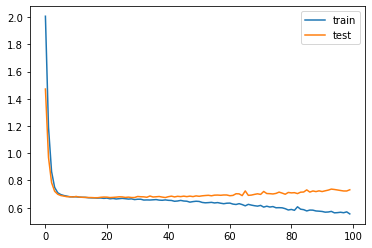

Running for : Benazepril hydrochloride tablet
Random over-sampling:
0    1569
1    1569
Name: Benazepril hydrochloride tablet, dtype: int64
For : Benazepril hydrochloride tablet 
Reports:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       314
           1       0.50      1.00      0.67       314

    accuracy                           0.50       628
   macro avg       0.25      0.50      0.33       628
weighted avg       0.25      0.50      0.33       628



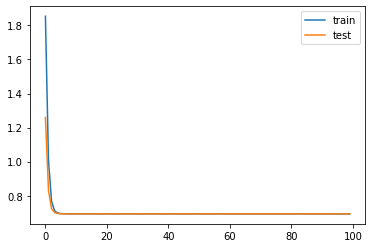

Running for : Deslanoside injection
Random over-sampling:
0    1014
1    1014
Name: Deslanoside injection, dtype: int64
For : Deslanoside injection 
Reports:
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       203
           1       0.71      0.79      0.75       203

    accuracy                           0.74       406
   macro avg       0.74      0.74      0.74       406
weighted avg       0.74      0.74      0.74       406



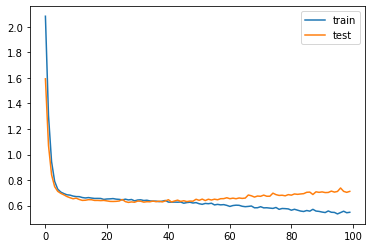

Running for : Digoxin tablet
Random over-sampling:
0    1006
1    1006
Name: Digoxin tablet, dtype: int64
For : Digoxin tablet 
Reports:
               precision    recall  f1-score   support

           0       0.74      0.57      0.64       202
           1       0.65      0.80      0.72       201

    accuracy                           0.68       403
   macro avg       0.70      0.69      0.68       403
weighted avg       0.70      0.68      0.68       403



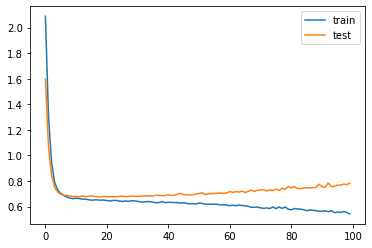

Running for : Dobutamine hydrochloride injection
Random over-sampling:
0    1981
1    1981
Name: Dobutamine hydrochloride injection, dtype: int64
For : Dobutamine hydrochloride injection 
Reports:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       397
           1       0.99      1.00      0.99       396

    accuracy                           0.99       793
   macro avg       0.99      0.99      0.99       793
weighted avg       1.00      0.99      0.99       793



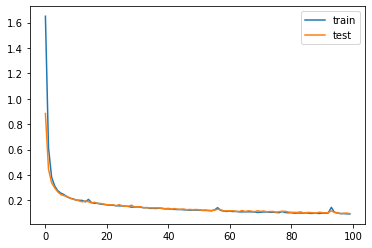

Running for : Furosemide injection
Random over-sampling:
0    1714
1    1714
Name: Furosemide injection, dtype: int64
For : Furosemide injection 
Reports:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89       343
           1       0.97      0.79      0.87       343

    accuracy                           0.88       686
   macro avg       0.90      0.88      0.88       686
weighted avg       0.90      0.88      0.88       686



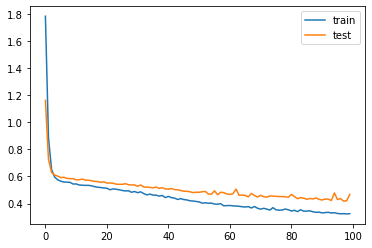

Running for : Furosemide tablet
Random over-sampling:
0    1638
1    1638
Name: Furosemide tablet, dtype: int64


KeyboardInterrupt: 

In [9]:
for drug_name in df.columns:
    os.environ['PYTHONHASHSEED']=str(1234)
    tf.random.set_seed(1234)
    np.random.seed(1234)
    random.seed(1234)
    print("Running for :",drug_name)
    trainer = pd.concat([PCA_df, df[drug_name]], axis = 1)
    metrics = model(drug = drug_name, trainer = trainer)
    report, hst = metrics[0], metrics[1]
    report_plot(drug_name,report,hst)